<a href="https://colab.research.google.com/github/leoonhardt/mantenimientopredictivo/blob/main/Ejemplo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción de parámetros frecuenciales

# Transformada corta de Fourier

La transformada corta de Fourier se utiliza para señales no estacionarias y consiste en aplicar la transformada de Fourier en una ventana de datos "deslizante". El resultado es una representación en el tiempo del espectro en frecuencia de la señal. Es importante la selección del ancho de la ventana, ya que define la resolución en tiempo y en frecuencia. 

<div align="center"><img src="https://raw.githubusercontent.com/leoonhardt/mantenimientopredictivo/master/datos/ejemplo3/sfft.PNG" height="400"></div>

La segunda imagen se conoce como espectrograma. 

Veremos un ejemplo a continuación: 

Importamos en primer lugar las librerías a utilizar, en particular, el módulo signal de la librería scipy contiene diversas herramientas de análisis tiempo-frecuencia: 




In [4]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi



Creamos a continuación una señal con una frecuencia de muestreo de 10000 Hz y con 100000 datos, creamos además su correspondiente vector de tiempo. Crearemos una señal portadora modulada en frecuencia, la señal portadora será una señal de seno con una frecuencia de 3000 Hz modulada. Se agregará además ruido con el fin de simular datos reales. Graficaremos la señal portadora modulada y la señal portadora con ruido:

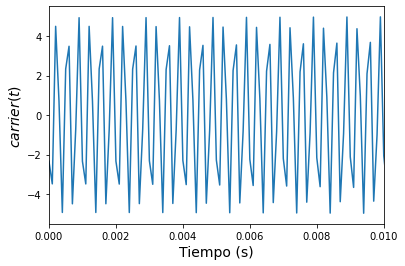

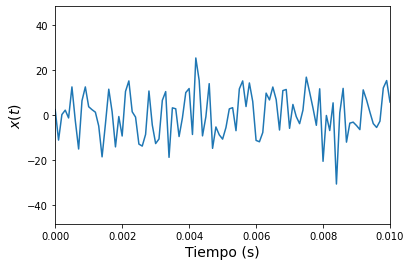

In [6]:
fs = 10e3 #frecuencia de muestreo Hz
N = 100000 #numero de datos
dt = 1/fs # Espaciado temporal
t = np.linspace(0, (N-1)*dt, N)  # Intervalo de tiempo en segundos
mod = 500*np.cos(2*np.pi*0.25*t)
carrier = 5 * np.sin(2*np.pi*3e3*t + mod)
mu, sigma = 0, 10
noise = np.random.normal(mu,sigma,N)
x = carrier + noise

plt.plot(t, carrier)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('$carrier(t)$', fontsize=14)
plt.xlim(0,0.01)
plt.show()

plt.plot(t, x)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('$x(t)$', fontsize=14)
plt.xlim(0,0.01)
plt.show()



Segun lo esperado, la señal portadora no es visualmente identificable debido al ruido generado, calcularemos a continuación el espectograma de las señal, en segmentos de 500 datos, con un overlap de 250 datos.

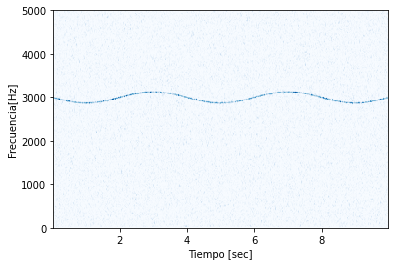

In [7]:
f, t, Sxx = signal.spectrogram(x, fs,window='hann',nperseg=500,noverlap=250)
plt.figure()
plt.pcolormesh(t, f, Sxx,cmap='Blues')
plt.ylabel('Frecuencia[Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()


En el espectograma observamos el contenido en frecuencia en el tiempo, podemos observar que la frecuencia oscila cercana a los 3000 Hz de la frecuencia portadora, la oscilación es debido a la modulación. Así es como podemos observar de forma clara la utilidad del espectrograma como herramienta de identificación de cambios frecuenciales en el tiempo. 

# Espectograma en rodamientos

Aplicaremos la herramienta espectograma pero ahora sobre los datos de rodamientos del ejemplo 2 del GitHub, es decir, ropdamiento en buenas condiciones, con falla en la pista interna y con falla en la pista externa. 

Al igual que en los ejemplos anteriores, el primer paso corresponde a clonar el Github del curso, para poder utilizar los archivos en él.

In [3]:
!git clone https://github.com/leoonhardt/mantenimientopredictivo.git

Cloning into 'mantenimientopredictivo'...
remote: Enumerating objects: 218, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 218 (delta 74), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (218/218), 40.73 MiB | 19.54 MiB/s, done.
Resolving deltas: 100% (74/74), done.


Ya clonado el GitHub, se deben importar todas las librerías a utilizar y cargar los datos de los rodamientos.

In [5]:
#importar librerías
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import math
from scipy.fftpack import fft, fftfreq

#Leer datos
Datos0=sio.loadmat('/content/mantenimientopredictivo/datos/ejemplo2/normal.mat')
Datos1=sio.loadmat('/content/mantenimientopredictivo/datos/ejemplo2/outer.mat')
Datos2=sio.loadmat('/content/mantenimientopredictivo/datos/ejemplo2/inner.mat')
Normal=Datos0['normal']
Outer=Datos1['outer']
Inner=Datos2['inner']

#Datos
Fs=48828 #sampling rate
Nd=20000 #Numero de datos


Al igual que en el ejemplo anterior, se calculará el espectograma para cada una de las señales, en ventanas de 500 datos con un overlap de 250 datos, el resultado es graficado y se presenta a continuación:

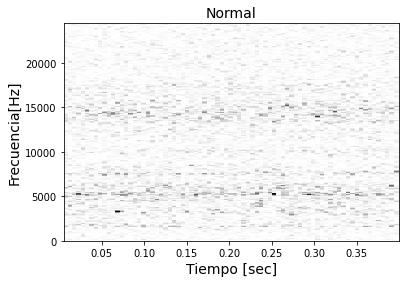

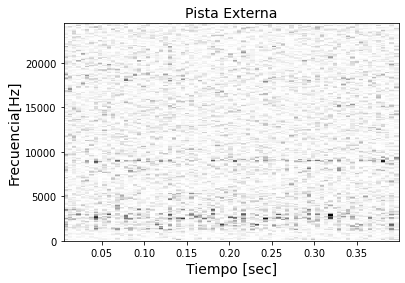

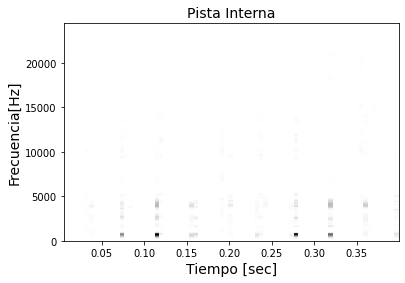

In [6]:
x1=Normal[1:Nd,0]
f, t, S1 = signal.spectrogram(x1,Fs,window='hann',nperseg=500,noverlap=250)

x2=Outer[1:Nd,0]
f, t, S2 = signal.spectrogram(x2,Fs,window='hann',nperseg=500,noverlap=250)

x3=Inner[1:Nd,0]
f, t, S3 = signal.spectrogram(x3,Fs,window='hann',nperseg=500,noverlap=250)

plt.pcolormesh(t, f, S1,cmap='binary')
plt.ylabel('Frecuencia[Hz]', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Normal', fontsize=14)
plt.show()

plt.pcolormesh(t, f, S2,cmap='binary')
plt.ylabel('Frecuencia[Hz]', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista Externa', fontsize=14)
plt.show()

plt.pcolormesh(t, f, S3,cmap='binary')
plt.ylabel('Frecuencia[Hz]', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista Interna', fontsize=14)
plt.show()

En el caso normal se observa una mayor amplitud en los 5000 y 15000 Hz, y no se observa un cambio significativo, es decir, un comportamiento relativamente estacionario. Para el caso de la pista externa se observa un patrón temporal, amplitudes que aumentan ydisminuyen periodicamente, este comportamiento se ve mucho más marcado en la pista interna, estos patrones temporales son debido a las fallas de los rodamientos, por ejemplo, cada vez que un elemento rodante pasa por una grieta en la pista interna, genera un impacto que se ve reflejado en ese cambio frecuencial de los espectogramas.

# Extracción de parámetros: Wavelets

 A diferencia de la transformada de Fourier donde se ocupan funciones base estacionarias (exponencial compleja), la transformada de Wavelet utiliza funciones base no estacionarias. Estas funciones se denominan “wavelets” y pueden dilatarse y desfasarse en función del tiempo. 

La principal ventaja es que la resolución en tiempo y frecuencia son independientes. Por lo tanto, se puede estudiar el contenido en frecuencia de la señal sin perder información en el dominio temporal.

En clases se explicó en más detalle este concepto, veremos a continuación su aplicación sobre las señales de los rodamientos anteriores: 

Nuevamente en primer lugar importamos las librerías y los datos, generamos además sus vectores temporales asociados:

In [9]:
#importar librerias
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pywt

#Leer datos
Datos0=sio.loadmat('/content/mantenimientopredictivo/datos/ejemplo2/normal.mat')
Datos1=sio.loadmat('/content/mantenimientopredictivo/datos/ejemplo2/outer.mat')
Datos2=sio.loadmat('/content/mantenimientopredictivo/datos/ejemplo2/inner.mat')
Normal=Datos0['normal']
Outer=Datos1['outer']
Inner=Datos2['inner']

#Datos
Fs=48828 #sampling rate
dt=1/Fs
Nd=20000

scales=np.arange(1, 50)

x1=Normal[1:Nd,0]
x2=Outer[1:Nd,0]
x3=Inner[1:Nd,0]
t = np.linspace(0, (Nd-1)*dt, Nd)  # Intervalo de tiempo en segundos


Calculamos ahora su wavelet para cada una de las señales y las graficamos: 

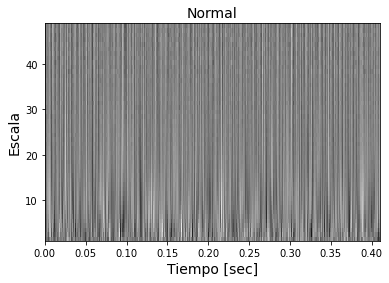

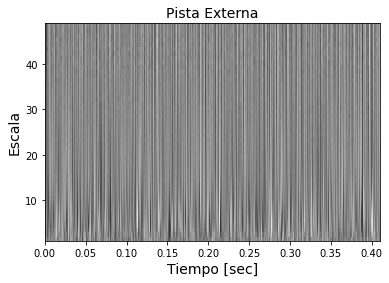

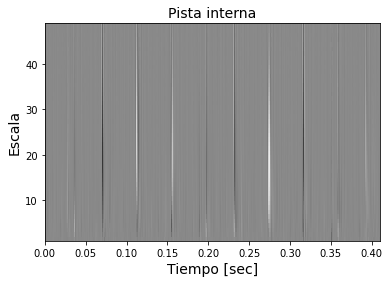

In [10]:
wavlist = pywt.wavelist(kind='continuous')

cwt1,frec1 = pywt.cwt(x1,scales,'gaus1')
cwt2,frec2 = pywt.cwt(x2,scales,'gaus1')
cwt3,frec3 = pywt.cwt(x3,scales,'gaus1')

plt.pcolormesh(t,scales,cwt1,cmap='binary')
plt.ylabel('Escala', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Normal', fontsize=14)
plt.show()

plt.pcolormesh(t,scales,cwt2,cmap='binary')
plt.ylabel('Escala', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista Externa', fontsize=14)
plt.show()

plt.pcolormesh(t,scales,cwt3,cmap='binary')
plt.ylabel('Escala', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista interna', fontsize=14)
plt.show()


El resultado anterior es de dificil interpretación física, sin embargo, podemnos observar diferencias significativas entre el wavelet de la señal normal y en de la señal de la pista interna, lo anterior ya es un indicador de cierta anomalía que, pensando en un algoritmo de detección de anomalías, permitiría una correcta diferenciación entre cada una de las señales ingresadas.